In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] limma_3.50.3          forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.0           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.1.7          ggplot2_3.3.6        
[10] tidyverse_1.3.2       AnnotationDbi_1.56.2  IRanges_2.28.0       


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
# load in data to be used
load(file = "pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")

In [4]:
ls()

[1] "datExpr_CN_AD.gender_rin_corrected"  "datExpr_CN_MCI.gender_rin_corrected"
[3] "datExpr_MCI_AD.gender_rin_corrected" "datTraits_CN_AD"                    
[5] "datTraits_CN_MCI"                    "datTraits_MCI_AD"

## Filter datExpr by highly variable genes

In [7]:
datExpr_CN_AD_variance <- data.frame(matrix(nrow = ncol(datExpr_CN_AD.gender_rin_corrected), ncol = 1))
rownames(datExpr_CN_AD_variance) <- colnames(datExpr_CN_AD.gender_rin_corrected)
colnames(datExpr_CN_AD_variance)  <- "Variance"

datExpr_CN_AD_variance["Variance"] <- lapply(datExpr_CN_AD.gender_rin_corrected, var) %>% unlist
datExpr_CN_AD_variance$gene <- rownames(datExpr_CN_AD_variance)

datExpr_CN_AD_variance %>% head

,Variance,gene
,<dbl>,<chr>
11715100_at,0.03127447,11715100_at
11715101_s_at,0.04058626,11715101_s_at
11715102_x_at,0.02847083,11715102_x_at
11715103_x_at,0.06011471,11715103_x_at
11715104_s_at,0.02232896,11715104_s_at
11715105_at,0.01835041,11715105_at


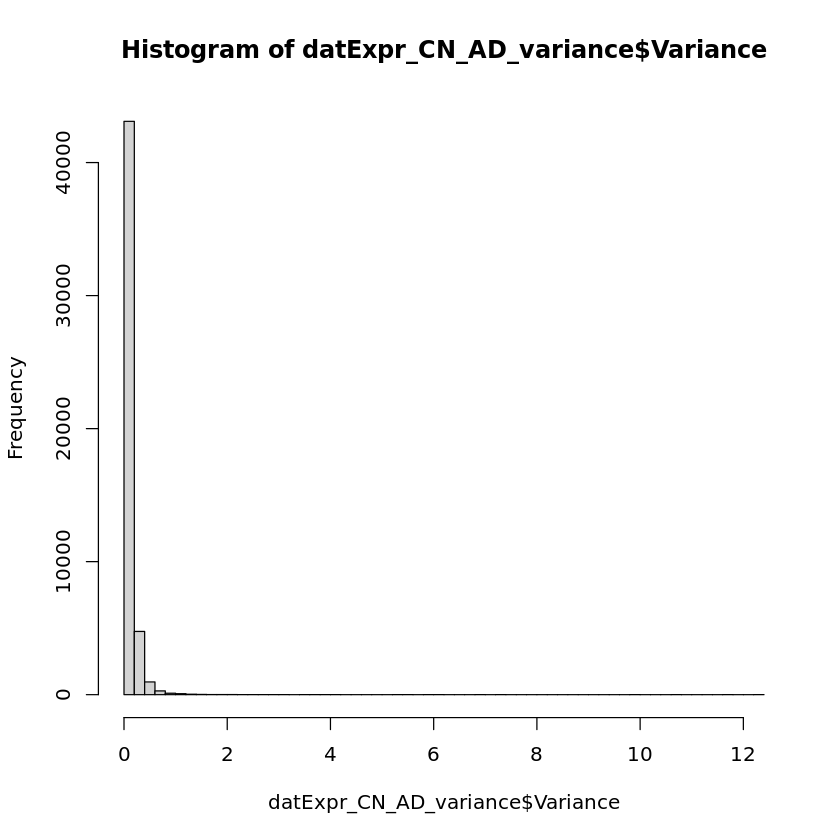

In [8]:
hist(datExpr_CN_AD_variance$Variance, breaks = 50)

In [11]:
# identify top 20000 highly variable genes based on variance
datExpr_CN_AD_HVGs <- (datExpr_CN_AD_variance[order(datExpr_CN_AD_variance$Variance, decreasing = TRUE), ])[1:20000,]
datExpr_CN_AD_HVGs %>% head

# select HVGs from datExpr
datExpr_CN_AD_selectHVGs <- datExpr_CN_AD.gender_rin_corrected[, rownames(datExpr_CN_AD_HVGs)]
datExpr_CN_AD_selectHVGs %>% head

,Variance,gene
,<dbl>,<chr>
11756083_x_at,12.331830,11756083_x_at
11732801_at,11.757444,11732801_at
11755998_x_at,10.774827,11755998_x_at
11760799_x_at,9.988634,11760799_x_at
11732800_a_at,7.376255,11732800_a_at
11752660_a_at,6.993035,11752660_a_at


,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11762641_x_at,11724799_x_at,11732901_a_at,⋯,11755187_a_at,11730875_a_at,11717356_at,11741592_x_at,11744145_at,11724495_a_at,11732983_a_at,11721387_at,11734678_a_at,11727070_a_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,3.904916,11.758251,6.169168,4.880302,9.838619,9.694743,2.253571,6.633286,9.006948,4.547537,⋯,3.623558,5.559549,7.198859,2.259571,7.641852,6.221709,5.227919,7.357887,5.935903,6.392842
037_S_4410,2.273390,3.309579,9.956827,4.444032,3.101790,2.806587,4.148050,8.039261,10.223828,2.811678,⋯,3.898745,5.548950,6.642064,2.695536,7.160010,6.316672,4.739576,8.146998,5.588418,6.399520
006_S_4153,9.831570,3.169069,2.472549,10.241115,2.951035,2.738199,2.904868,8.541263,11.189960,9.358760,⋯,3.773781,5.478924,7.018460,2.406671,7.351782,6.545020,4.706896,7.290907,5.652177,6.045068
116_S_1232,11.809931,3.376748,4.129394,5.084570,2.869660,2.799016,3.169216,7.152297,9.860731,2.653199,⋯,3.821487,5.468198,7.377013,2.109658,7.191905,6.223996,4.676023,7.499791,5.534867,5.830285
128_S_0205,2.129400,10.924831,9.475089,5.393071,9.078207,8.816805,4.142875,6.826449,9.333986,5.212071,⋯,3.164002,5.716231,7.185166,2.562700,7.278147,6.484683,4.584935,7.371771,5.675780,6.464782
037_S_4308,8.629915,5.838758,6.806196,5.677971,5.074888,5.205904,3.894679,4.901369,7.872648,3.134468,⋯,3.228293,5.610756,7.198258,2.566305,7.516017,6.195627,4.557841,7.867661,5.941533,6.385693


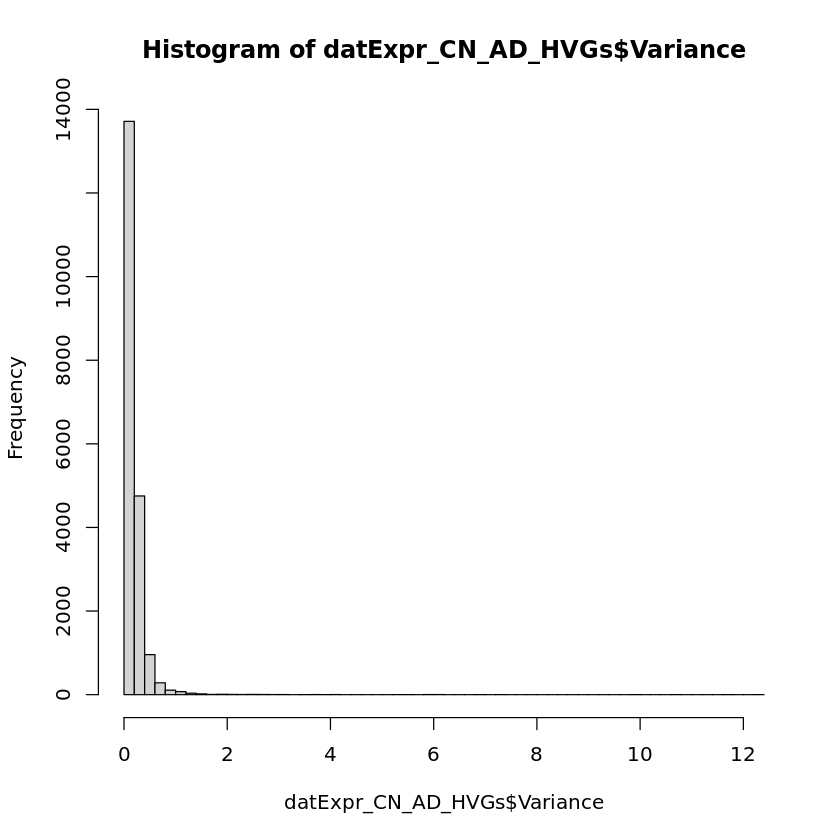

In [14]:
hist(datExpr_CN_AD_HVGs$Variance, breaks = 50)

In [13]:
# save HVGs as RData
save(datExpr_CN_AD_selectHVGs, file = "pairwise_RData_files/datExpr_CN_AD_limmaCorrected_selectHVGs.RData")

In [15]:
# pick soft thresholding power
start <- Sys.time()
# Choose a set of soft-thresholding powers:
powers <- c(c(1:10), seq(from=12, to=20, by=2))
# Call the network topology function
sft <- pickSoftThreshold(datExpr_CN_AD_selectHVGs, powerVector = powers, verbose = 5)
print(Sys.time() - start)

pickSoftThreshold: will use block size 2236.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2236 of 20000


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 2237 through 4472 of 20000
   ..working on genes 4473 through 6708 of 20000
   ..working on genes 6709 through 8944 of 20000
   ..working on genes 8945 through 11180 of 20000
   ..working on genes 11181 through 13416 of 20000
   ..working on genes 13417 through 15652 of 20000
   ..working on genes 15653 through 17888 of 20000
   ..working on genes 17889 through 20000 of 20000
   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.0628 -0.38          0.857 3320.000  3.17e+03 6600.0
2      2   0.6040 -1.31          0.852  945.000  7.71e+02 3180.0
3      3   0.7220 -1.59          0.888  359.000  2.36e+02 1830.0
4      4   0.7740 -1.71          0.922  163.000  8.24e+01 1180.0
5      5   0.7830 -1.79          0.934   83.900  3.21e+01  805.0
6      6   0.7950 -1.84          0.947   46.900  1.36e+01  576.0
7      7   0.7800 -1.90          0.947   28.000  6.05e+00  426.0
8      8   0.7990 -1.90          0.963   17.600  2.95e+00  323.0
9      9   0.8

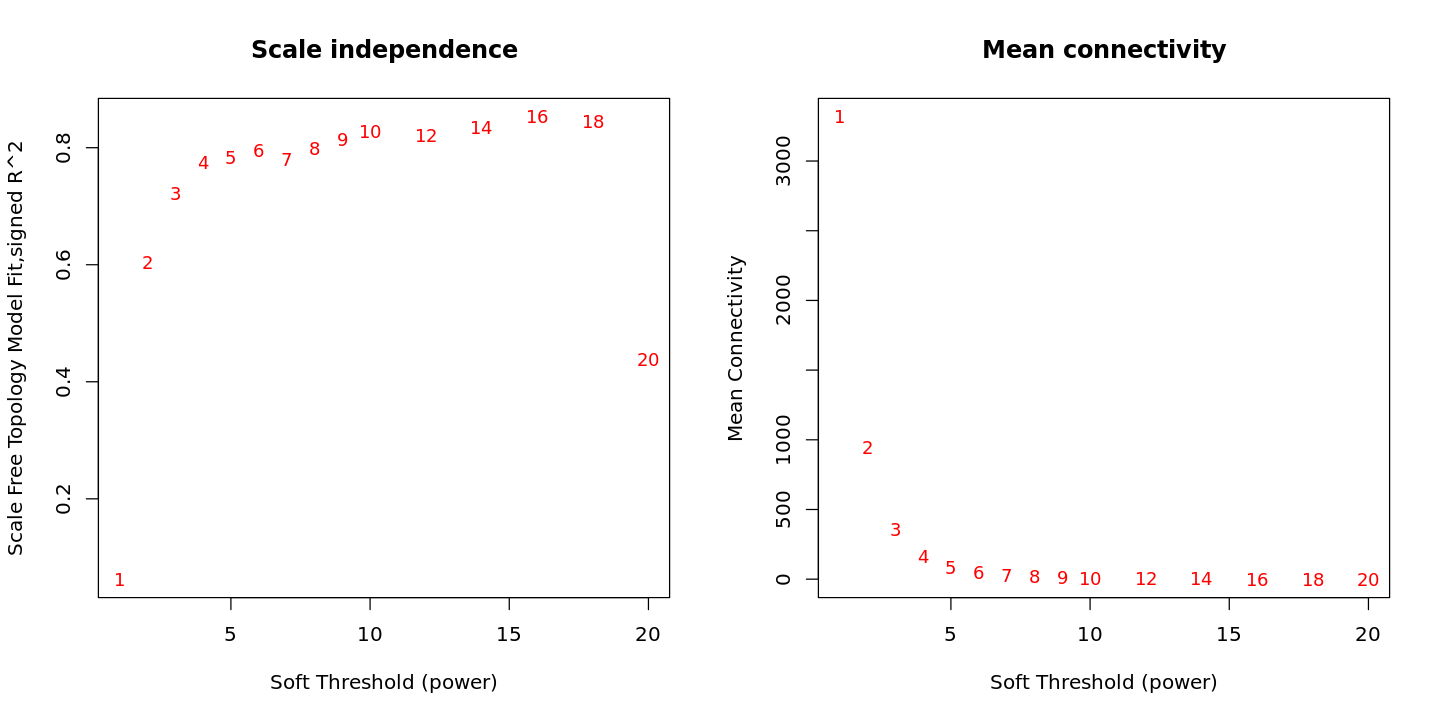

In [16]:
options(repr.plot.width=12, repr.plot.height=6)
# Plot results from soft-thresholding powers
par(mfrow = c(1,2));
cex1 = 0.9;

# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");

# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

# Trying power = 6 

## Co-expression similarity and adjacency

In [17]:
start <- Sys.time()
softPower <- 6
adjacency <- WGCNA::adjacency(datExpr_CN_AD_selectHVGs, 
                              power = softPower)
print(Sys.time() - start)

Time difference of 16.64209 mins


In [18]:
adjacency %>% head

,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11762641_x_at,11724799_x_at,11732901_a_at,⋯,11755187_a_at,11730875_a_at,11717356_at,11741592_x_at,11744145_at,11724495_a_at,11732983_a_at,11721387_at,11734678_a_at,11727070_a_at
11756083_x_at,1.000000e+00,2.068275e-06,1.794181e-03,5.350278e-10,1.552042e-06,1.514006e-06,3.348748e-09,2.753425e-03,2.327112e-04,1.133894e-12,⋯,9.259274e-10,1.080298e-09,1.418536e-11,9.056111e-10,5.632613e-09,2.017282e-08,6.409032e-11,2.335856e-11,3.868821e-12,2.501481e-08
11732801_at,2.068275e-06,1.000000e+00,1.870401e-07,2.803605e-11,9.821520e-01,9.800391e-01,8.203470e-11,1.805140e-05,1.835003e-06,6.227604e-08,⋯,3.272558e-08,1.295768e-06,3.107597e-06,7.358400e-09,7.298449e-12,1.371424e-13,1.442699e-06,5.952751e-13,3.241057e-10,3.317954e-06
11755998_x_at,1.794181e-03,1.870401e-07,1.000000e+00,7.553410e-12,1.625220e-07,2.247680e-07,9.113069e-11,4.989700e-03,2.322079e-03,2.123287e-07,⋯,3.182102e-14,5.128847e-15,3.125790e-06,2.055880e-08,2.743832e-09,4.377112e-12,1.688397e-08,2.012379e-10,1.004600e-07,1.459159e-06
11760799_x_at,5.350278e-10,2.803605e-11,7.553410e-12,1.000000e+00,1.639949e-10,5.104348e-11,1.383876e-10,3.466965e-10,1.268589e-11,1.078915e-05,⋯,9.107693e-14,2.428239e-09,5.964672e-08,6.992375e-12,7.412168e-10,2.254299e-11,1.509379e-09,1.516417e-11,3.526982e-09,6.447084e-10
11732800_a_at,1.552042e-06,9.821520e-01,1.625220e-07,1.639949e-10,1.000000e+00,9.869446e-01,1.371982e-10,1.208696e-05,1.084744e-06,2.795727e-08,⋯,3.277411e-08,2.392344e-06,4.443201e-06,9.274729e-09,2.555603e-11,5.523834e-12,1.252132e-06,3.457639e-17,2.142038e-09,6.402449e-06
11752660_a_at,1.514006e-06,9.800391e-01,2.247680e-07,5.104348e-11,9.869446e-01,1.000000e+00,1.447629e-10,1.483585e-05,1.510419e-06,2.573417e-08,⋯,3.545177e-08,1.543729e-06,4.333358e-06,6.331758e-09,9.473746e-11,9.676825e-15,8.479821e-07,1.715904e-14,2.324657e-09,4.798607e-06


In [19]:
# save output so I don't have to keep loading the whole workspace
adjacency_CN_AD <- adjacency
save(adjacency_CN_AD, file = "pairwise_RData_files/20230418_adjacency_CN_AD.RData")

## Topological overlap matrix

In [20]:
# Turn adjacency into topological overlap
start <- Sys.time()
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM 
print( Sys.time() - start )

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
Time difference of 34.25102 secs


In [21]:
dissTOM_CN_AD <- dissTOM
save(dissTOM_CN_AD, file = "pairwise_RData_files/20230418_dissTOM_CN_AD.RData")

## Clustering using TOM

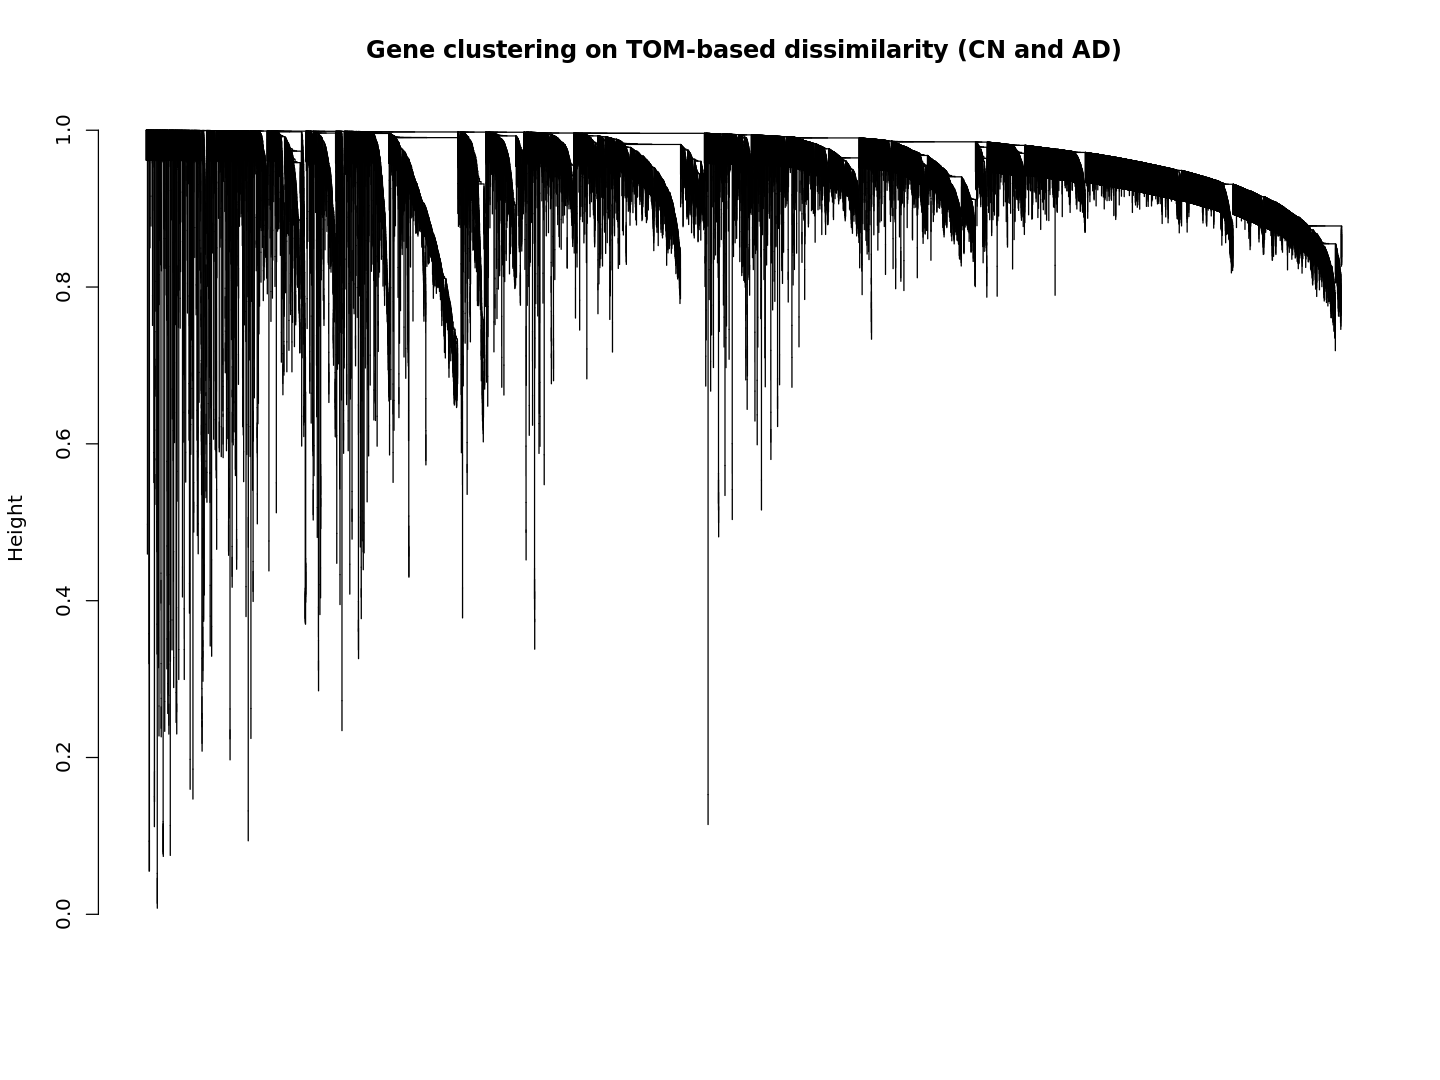

In [22]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width = 12, repr.plot.height = 9)
plot(geneTree, xlab="", sub="", 
     main = "Gene clustering on TOM-based dissimilarity (CN and AD)",
     labels = FALSE, hang = 0.04);

In [23]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                            deepSplit = 2, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize);
table(dynamicMods) # 33 modules

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 705 6595 2604 1354 1216  984  950  667  582  506  383  365  296  284  260  257 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 194  189  186  185  184  150  135  127  116   75   74   74   72   58   52   52 
  32   33 
  39   30 

dynamicColors
         black           blue          brown           cyan      darkgreen 
           667           2604           1354            260            135 
      darkgrey darkolivegreen     darkorange        darkred  darkturquoise 
           116             30             74            150            127 
         green    greenyellow           grey         grey60      lightcyan 
           984            365            705            189            194 
    lightgreen    lightyellow        magenta   midnightblue         orange 
           186            185            506            257             75 
 paleturquoise           pink         purple            red      royalblue 
            52            582            383            950            184 
   saddlebrown         salmon        skyblue      steelblue            tan 
            58            284             72             52            296 
     turquoise         violet          white         yellow 
          659

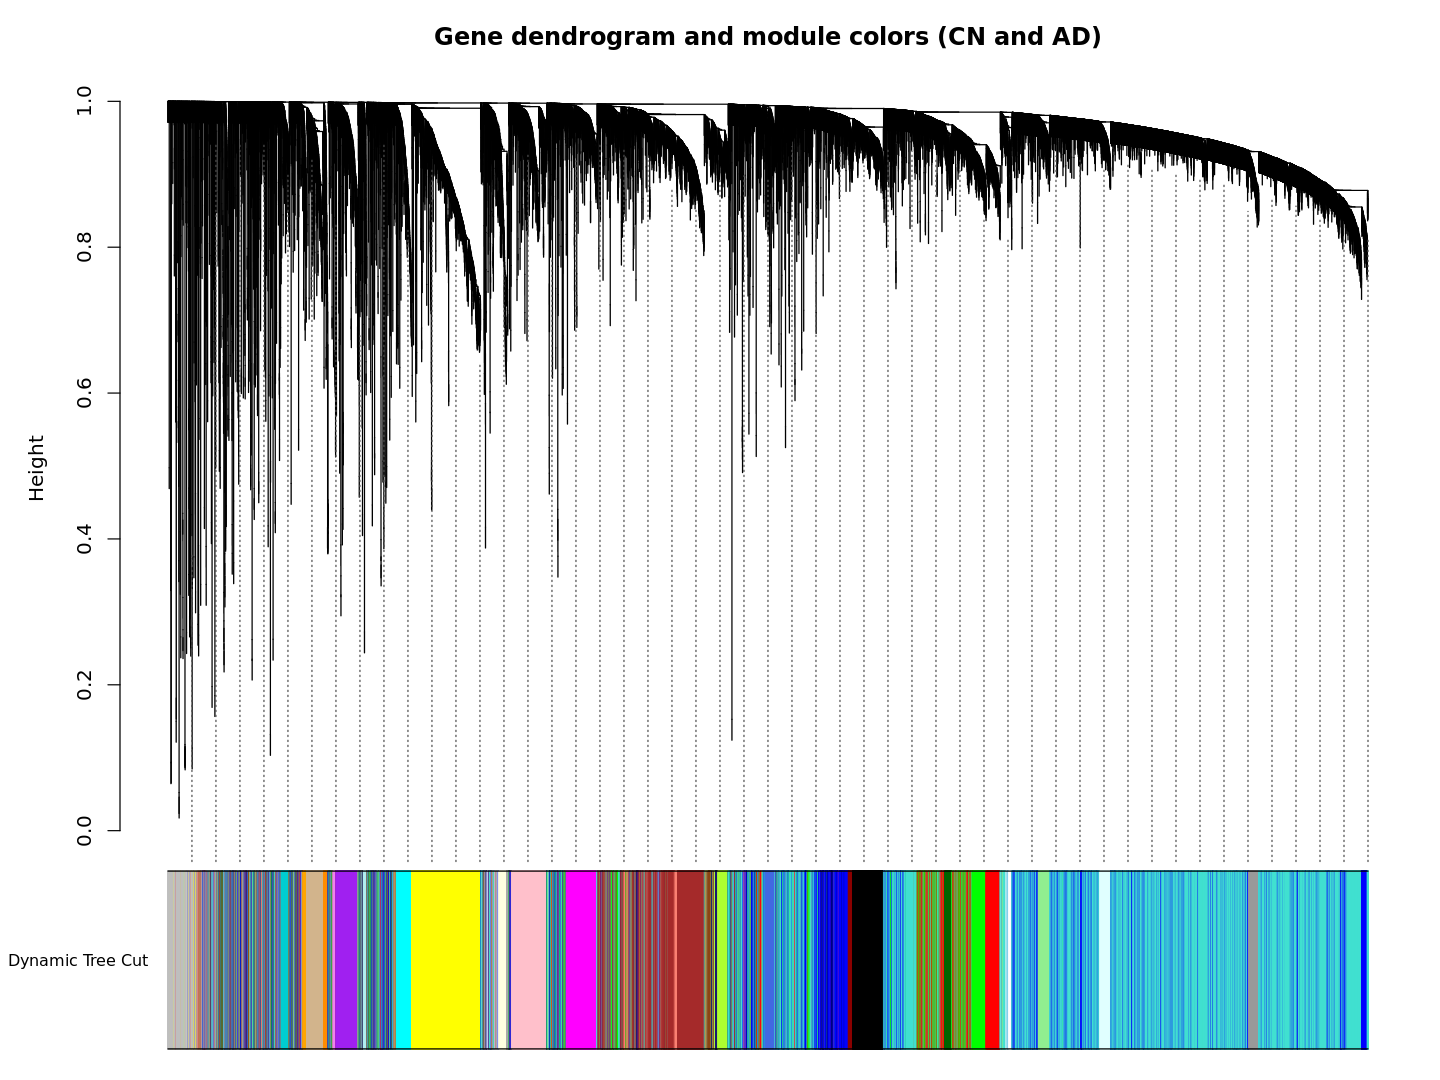

In [24]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
#sizeGrWindow(8,6)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors (CN and AD)")

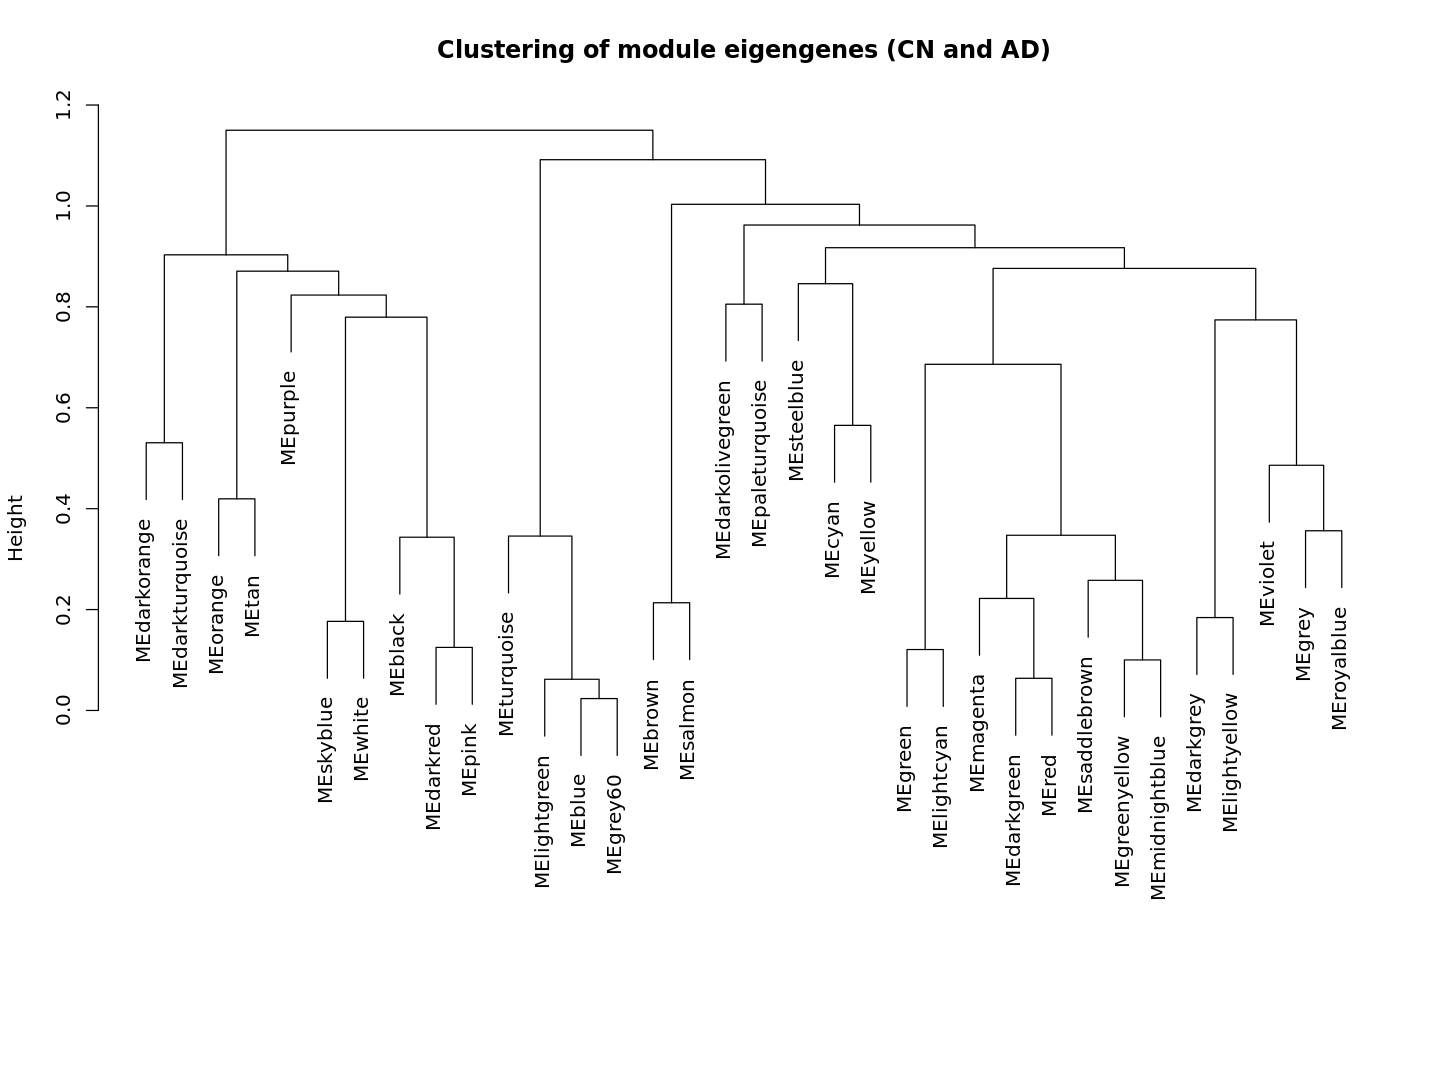

In [25]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr_CN_AD_selectHVGs, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
# sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

## Merge modules with similar expression profiles

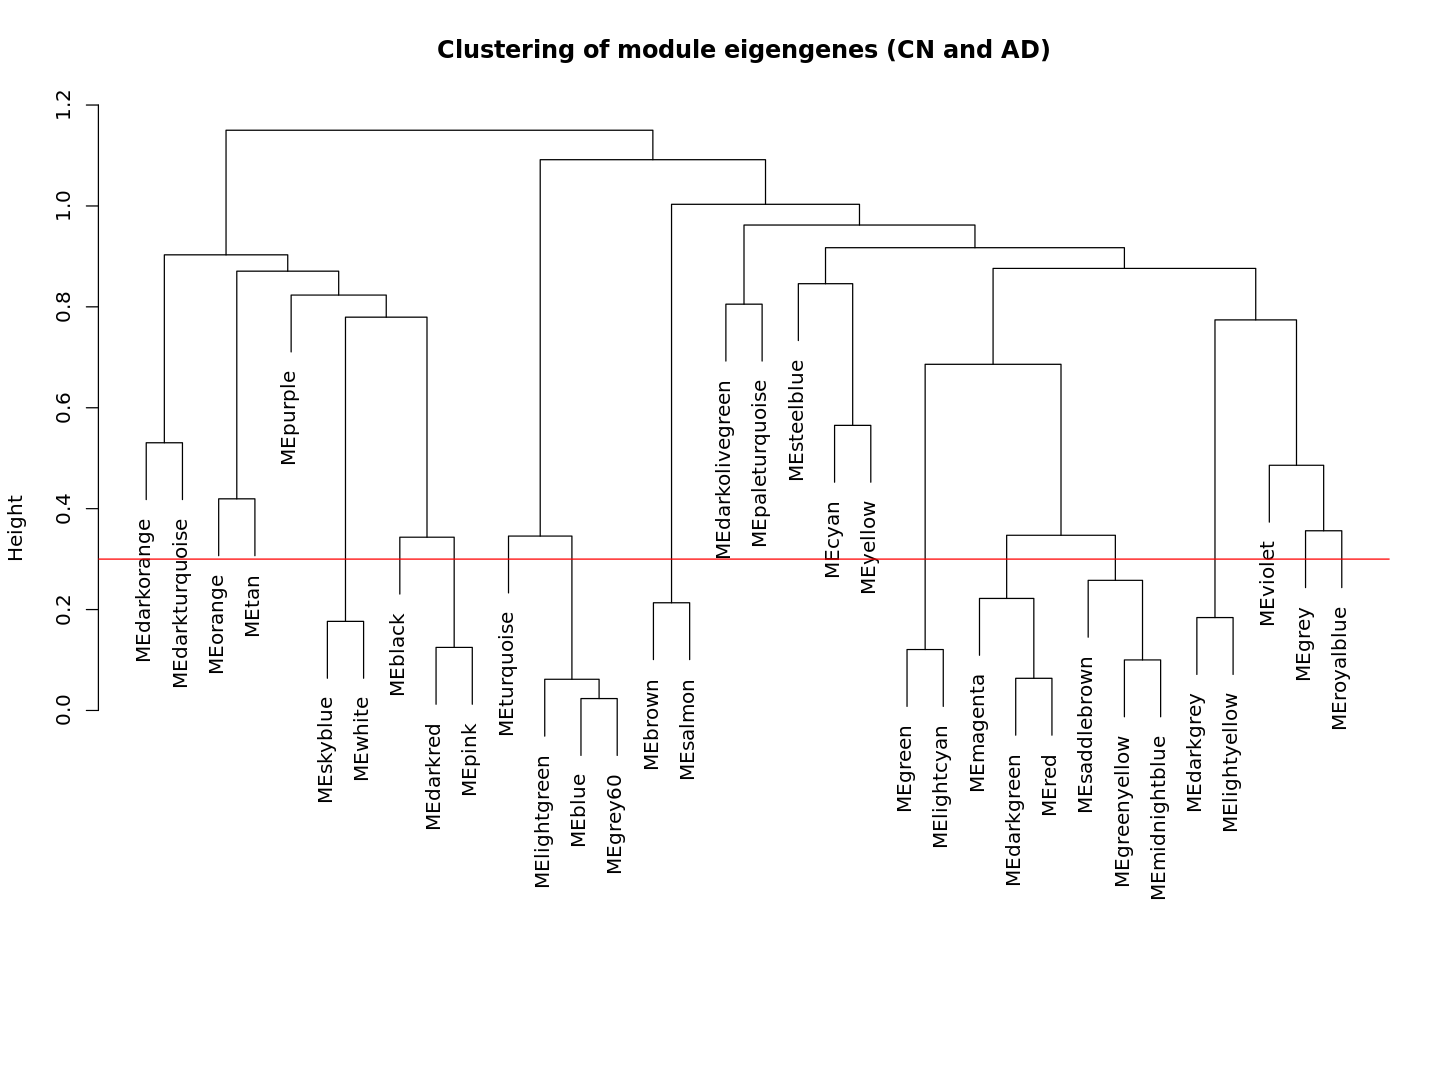

In [42]:
options(repr.plot.width = 12, repr.plot.height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.3
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [44]:
pdf(file = "pairwise_plots/merge_modules_CN_AD_limmaCorrected.pdf", width = 12, height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.3
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

dev.off()

png 
  2

In [45]:
# Call an automatic merging function
start <- Sys.time()
merge = mergeCloseModules(datExpr_CN_AD_selectHVGs, dynamicColors, 
                          cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
print(Sys.time() - start)

 mergeCloseModules: Merging modules whose distance is less than 0.3
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 34 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 23 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 21 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 21 module eigengenes in given set.
Time difference of 12.44553 secs


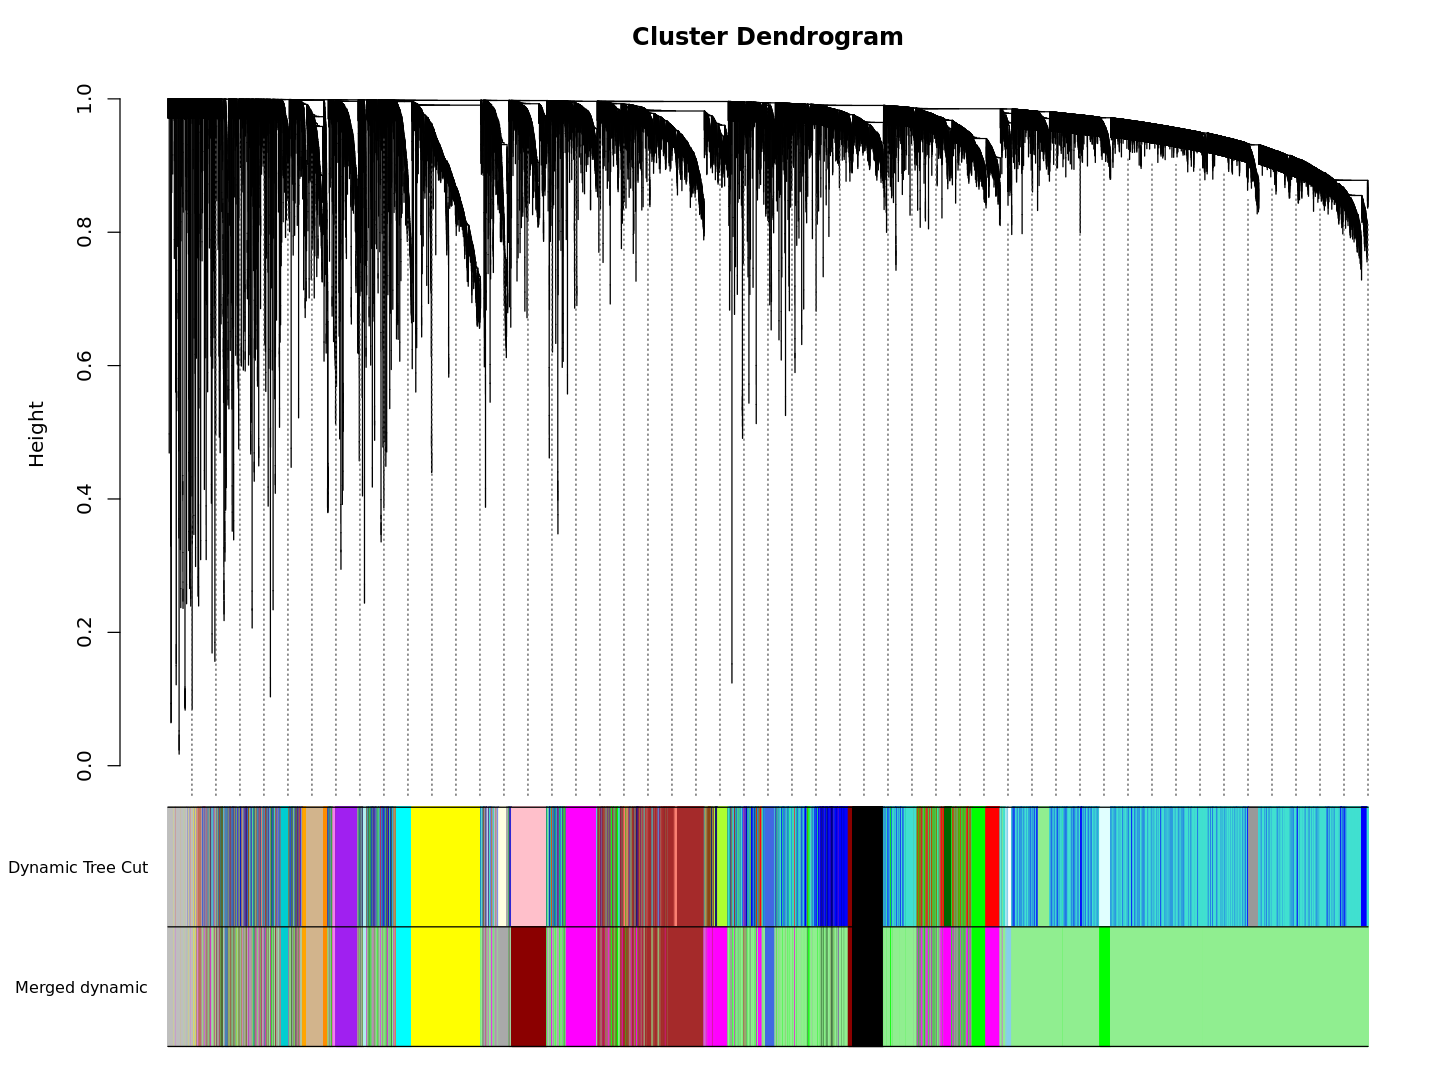

In [46]:
options(repr.plot.width = 12, repr.plot.height = 9)
# sizeGrWindow(12, 9)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [47]:
pdf(file = "pairwise_plots/CN_AD_limmaCorrected_geneDendro-3.pdf", wi = 12, he = 9)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
dev.off()

png 
  2

In [48]:
# Rename to moduleColors
moduleColors_CN_AD = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels_CN_AD = match(moduleColors_CN_AD, colorOrder)-1;
MEs_CN_AD = mergedMEs;
geneTree_CN_AD = geneTree;

# Save module colors and labels for use in subsequent parts
save(MEs_CN_AD, moduleLabels_CN_AD, moduleColors_CN_AD, geneTree_CN_AD, file = "pairwise_RData_files/20230418_CN_AD_limmaCorrected-02-networkConstruction-stepByStep.RData")